# Network example
From: https://programminghistorian.org/lessons/exploring-and-analyzing-network-data-with-python

Graphs are structures that map relations between objects. The objects are referred to as nodes and the connections between them as edges in this tutorial. Note that edges and nodes are commonly referred to by several names that generally mean exactly the same thing:
```
node == vertex == point
edge == arc == link
```

A set of nodes are the list names `[A, B, C]` while the edges are the list relations:
```
[(A,C)
 (B,A)]
```


We will work with and __Edge List__ from the general network described in [Networkx help](http://pynetwork.readthedocs.io/en/latest/networkx_load.html#edge-list):

```python
[(0, 1, {'weight': 4}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3})]
```

In [117]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
import pandas as pd
import networkx as nx
import numpy as np

In [72]:
nd=pd.read_csv( "https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv")
ed=pd.read_csv("https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv")

In [73]:
nd[:1]

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191


In [74]:
ed[:1]

,Source,Target
0,George Keith,Robert Barclay


## Example of conexions

In [75]:
cn=ed[np.logical_or(ed.Source=='Peter Collinson',ed.Target=='Peter Collinson')]
cn=cn.append(ed[np.logical_or(ed.Source=='John Bartram',ed.Target=='John Bartram')])
cn=cn.append(ed[np.logical_or(ed.Source=='James Logan',ed.Target=='James Logan')])
cn.drop_duplicates().sort_values('Source')

,Source,Target
110,James Logan,John Bartram
111,James Logan,William Penn
112,James Logan,David Lloyd
10,Peter Collinson,John Bartram
11,Peter Collinson,James Logan


```
William   David 
 \        /
  \      /
   \    /
   James
   /   \
  /     \
 /       \ 
Peter--- John
``` 
 
       

In [76]:
nd.Name.shape

(119,)

In [77]:
ed.shape

(174, 2)

##  Build the network

In [95]:
G=nx.Graph()

## Node list

In [96]:
G.add_nodes_from(nd.Name.values)

### Edge list
Convert edges in a list of tuples 

In [97]:
tuple_list=(ed.Source+'::'+ed.Target).str.split('::').map(tuple).values

In [81]:
tuple_list[:3]

array([('George Keith', 'Robert Barclay'),
       ('George Keith', 'Benjamin Furly'),
       ('George Keith', 'Anne Conway Viscountess Conway and Killultagh')], dtype=object)

In [98]:
G.add_edges_from(tuple_list)

In [99]:
print( nx.info(G) )

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


## Adding attributes
https://programminghistorian.org/lessons/exploring-and-analyzing-network-data-with-python#adding-attributes

For NetworkX, a Graph object is one big thing (your network) made up of two kinds of smaller things (your nodes and your edges). So far you’ve uploaded nodes and edges (as pairs of nodes), but NetworkX allows you to add attributes to both nodes and edges, providing more information about each of them. Later on in this tutorial, you’ll be running metrics and adding some of the results back to the Graph as attributes. For now, let’s make sure your Graph contains all of the attributes that are currently in our CSV.

You’ll want to return to a list you created at the beginning of your script: nodes. This list contains all of the rows from quakers_nodelist.csv, including columns for name, historical significance, gender, birth year, death year, and SDFB ID. You’ll want to loop through this list and add this information to our graph. There are a couple ways to do this, but NetworkX provides two convenient functions for adding attributes to all of a Graph’s nodes or edges at once: nx.set_node_attributes() and nx.set_edge_attributes(). To use these functions, you’ll need your attribute data to be in the form of a Python dictionary, in which node names are the keys and the attributes you want to add are the values.5 You’ll want to create a dictionary for each one of your attributes, and then add them using the functions above. The first thing you must do is create five empty dictionaries, using curly braces:



Each dictionary is obtained from a `Series` like

See https://stackoverflow.com/a/17426500/2268280

In [114]:
pd.Series(nd.ID.values,index=nd.Name)[:2]

Name
Joseph Wyeth                  10013191
Alexander Skene of Newtyle    10011149
dtype: int64

In [110]:
hist_sig_dict=pd.Series(nd['Historical Significance'].values,index=nd.Name).to_dict()
gender_dict=pd.Series(nd.Gender.values,index=nd.Name).to_dict()
birth_dict=pd.Series(nd.Birthdate.values,index=nd.Name).to_dict()
death_dict=pd.Series(nd.Deathdate.values,index=nd.Name).to_dict()
id_dict=pd.Series(nd.ID.values,index=nd.Name).to_dict()

# Visualization Layouts
http://pynetwork.readthedocs.io/en/latest/networkx_draw.html

In [136]:
ps=[nx.circular_layout(G),
 nx.random_layout(G),
 nx.shell_layout(G),
 nx.spring_layout(G),
 nx.spectral_layout(G),
 nx.fruchterman_reingold_layout(G)]

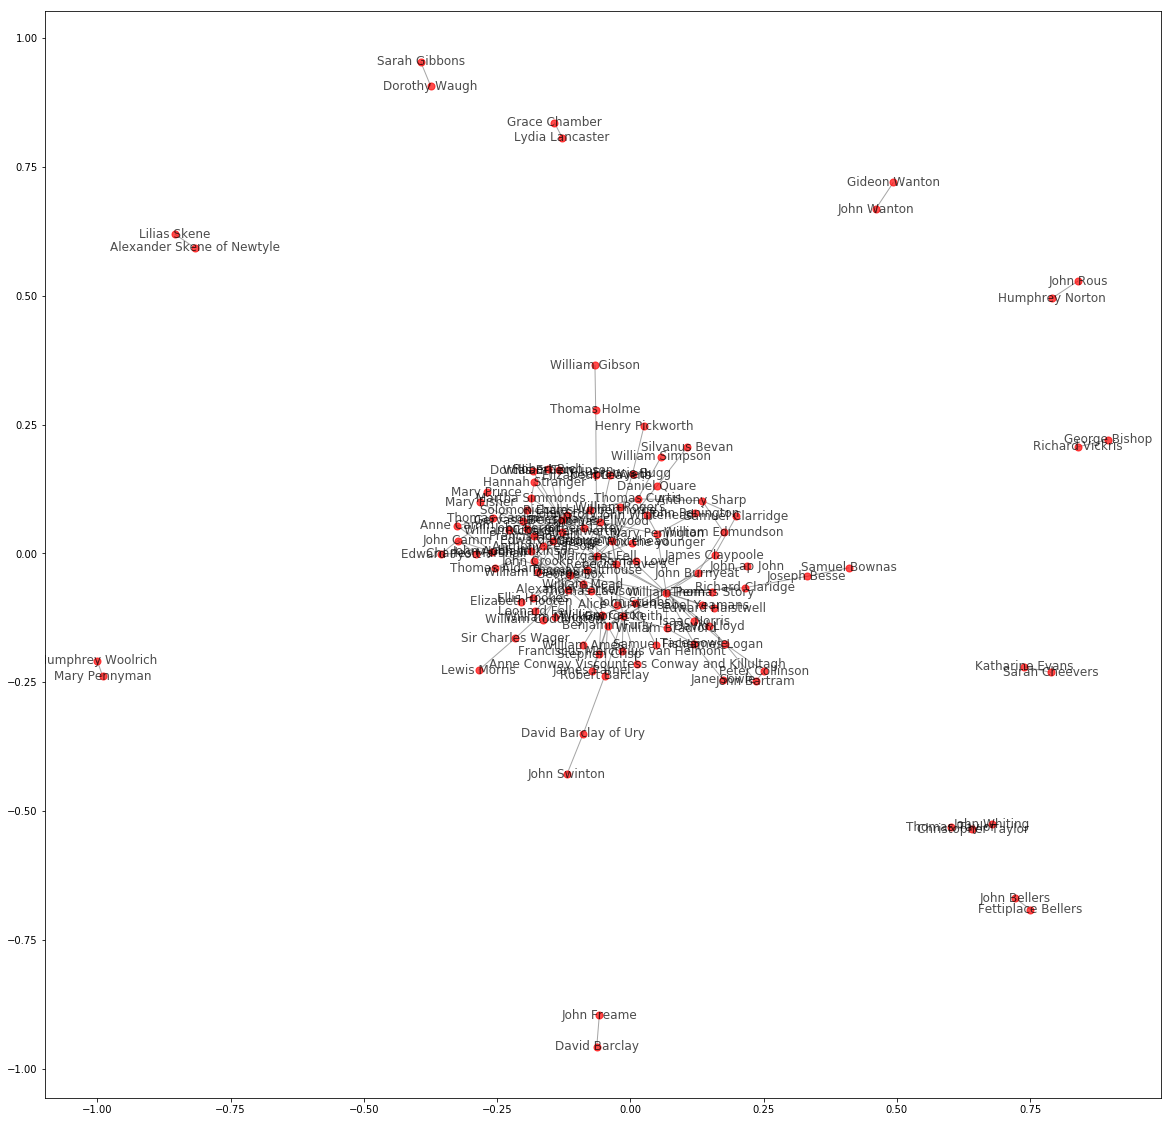

In [144]:
plt.figure(figsize=(20, 20))

# chose the layout
pos=ps[5]
nx.draw_networkx(G, pos, with_labels = True, node_size=50, node_color='red', \
                         alpha=0.7, edge_color='grey', width=1)


![IMG](https://programminghistorian.org/images/exploring-and-analyzing-network-data-with-python/exploring-and-analyzing-network-data-with-python-1.png)

## Appendix

Manipulating edges with attributes

In [42]:
df=pd.DataFrame( {'name1': ['Georgia','Georgia','Lee'], 
                  'name2': ['Lee','Claude','Claude'],
                  'weights':[{u'Weight': 10},{u'Weight': 90},{u'Weight': 0}]} )
df

,name1,name2,weights
0,Georgia,Lee,{'Weight': 10}
1,Georgia,Claude,{'Weight': 90}
2,Lee,Claude,{'Weight': 0}


In [43]:
df['relation'] = df['weights'].map(lambda x: x['Weight'])

In [44]:
df

,name1,name2,weights,relation
0,Georgia,Lee,{'Weight': 10},10
1,Georgia,Claude,{'Weight': 90},90
2,Lee,Claude,{'Weight': 0},0
